In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/E3SMv1_Future_Projection/figures'
save_fig = True

In [3]:
# set esgf
# esgf_root = '/Volumes/LaCie/data/cmip6/esgf/sea_ice'
esgf_root = os.environ['HOME']+'/data/cmip6/esgf/sea_ice'
# list of models
ivar = 0
var_list = ['siarean', 'siareas', 'sivoln', 'sivols']
varname = var_list[ivar]
prefix_list = [
    varname+'_SImon_ACCESS-CM2_ssp585_r1i1p1f1_gn',
    varname+'_SImon_ACCESS-CM2_ssp585_r3i1p1f1_gn',
    varname+'_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn',
    varname+'_SImon_ACCESS-ESM1-5_ssp585_r2i1p1f1_gn',
    varname+'_SImon_ACCESS-ESM1-5_ssp585_r3i1p1f1_gn',
    varname+'_SImon_CESM2_ssp585_r1i1p1f1_gn',
    varname+'_SImon_CESM2_ssp585_r2i1p1f1_gn',
    varname+'_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn',
    varname+'_SImon_CESM2-WACCM_ssp585_r2i1p1f1_gn',
    varname+'_SImon_CESM2-WACCM_ssp585_r3i1p1f1_gn',
    varname+'_SImon_CESM2-WACCM_ssp585_r4i1p1f1_gn',
    varname+'_SImon_CESM2-WACCM_ssp585_r5i1p1f1_gn',
    varname+'_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn',
    varname+'_SImon_CNRM-CM6-1_ssp585_r1i1p1f2_gn',
    varname+'_SImon_INM-CM4-8_ssp585_r1i1p1f1_gr1',
    varname+'_SImon_INM-CM5-0_ssp585_r1i1p1f1_gr1',
    varname+'_SImon_IPSL-CM6A-LR_ssp585_r14i1p1f1_gn',
    varname+'_SImon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn',
    varname+'_SImon_IPSL-CM6A-LR_ssp585_r2i1p1f1_gn',
    varname+'_SImon_IPSL-CM6A-LR_ssp585_r3i1p1f1_gn',
    varname+'_SImon_IPSL-CM6A-LR_ssp585_r4i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-HR_ssp585_r2i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-LR_ssp585_r10i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-LR_ssp585_r2i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-LR_ssp585_r3i1p1f1_gn',
    varname+'_SImon_MPI-ESM1-2-LR_ssp585_r4i1p1f1_gn',
    varname+'_SImon_MRI-ESM2-0_ssp585_r1i1p1f1_gm',
    varname+'_SImon_MRI-ESM2-0_ssp585_r1i2p1f1_gm',
    varname+'_SImon_NorESM2-LM_ssp585_r1i1p1f1_gn',
    varname+'_SImon_NorESM2-MM_ssp585_r1i1p1f1_gn',
    ]
print(len(prefix_list))
sources = []
for vprefix in prefix_list:
    var, realm, model, expid, variantid, gridid = vprefix.split('_')
    s = {
        'prefix': vprefix,
        'variable': var,
        'realm': realm,
        'model': model,
        'expid': expid,
        'variantid': variantid,
        'gridid': gridid,
    }
    sources.append(s)

32


In [4]:
# load esgf data
esgf_vars = []
f_init = False
for s in sources:
    print(s['prefix'])
    infile_list = [esgf_root+'/'+filename \
                   for filename in os.listdir(esgf_root) if filename.startswith(s['prefix'])]
    print('Opening {:d} files...'.format(len(infile_list)))
    dset = xr.open_mfdataset(infile_list, combine='by_coords')
    da = dset.data_vars[s['variable']]
    if not f_init:
        esgf_time = da.time
        f_init = True
    # ice volume for MPI-ESM1-2-HR and MPI-ESM1-2-LR 
    if s['model'].startswith('MPI-ESM1-2') and s['variable'].startswith('sivol'):
        da = da.copy(data=da.data/1.e12)
    # ice volume for NorESM2-LM and NorESM2-MM 
    if s['model'].startswith('NorESM2') and s['variable'].startswith('sivol'):
        da = da.copy(data=da.data/1.e3)
    esgf_vars.append(da)
    dset.close()

siarean_SImon_ACCESS-CM2_ssp585_r1i1p1f1_gn
Opening 1 files...
siarean_SImon_ACCESS-CM2_ssp585_r3i1p1f1_gn
Opening 1 files...
siarean_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn
Opening 1 files...
siarean_SImon_ACCESS-ESM1-5_ssp585_r2i1p1f1_gn
Opening 1 files...
siarean_SImon_ACCESS-ESM1-5_ssp585_r3i1p1f1_gn
Opening 1 files...
siarean_SImon_CESM2_ssp585_r1i1p1f1_gn
Opening 2 files...
siarean_SImon_CESM2_ssp585_r2i1p1f1_gn
Opening 2 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'siarean' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


siarean_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn
Opening 1 files...
siarean_SImon_CESM2-WACCM_ssp585_r2i1p1f1_gn
Opening 1 files...
siarean_SImon_CESM2-WACCM_ssp585_r3i1p1f1_gn
Opening 2 files...
siarean_SImon_CESM2-WACCM_ssp585_r4i1p1f1_gn
Opening 2 files...
siarean_SImon_CESM2-WACCM_ssp585_r5i1p1f1_gn
Opening 2 files...
siarean_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn
Opening 1 files...
siarean_SImon_CNRM-CM6-1_ssp585_r1i1p1f2_gn
Opening 1 files...
siarean_SImon_INM-CM4-8_ssp585_r1i1p1f1_gr1
Opening 1 files...
siarean_SImon_INM-CM5-0_ssp585_r1i1p1f1_gr1
Opening 1 files...
siarean_SImon_IPSL-CM6A-LR_ssp585_r14i1p1f1_gn
Opening 1 files...
siarean_SImon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn
Opening 1 files...
siarean_SImon_IPSL-CM6A-LR_ssp585_r2i1p1f1_gn
Opening 1 files...
siarean_SImon_IPSL-CM6A-LR_ssp585_r3i1p1f1_gn
Opening 1 files...
siarean_SImon_IPSL-CM6A-LR_ssp585_r4i1p1f1_gn
Opening 1 files...
siarean_SImon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn
Opening 18 files...
siarean_SImon_MPI-ESM1-2-HR_ssp5

In [5]:
esgf_data = []
for i, da in enumerate(esgf_vars):
    print(sources[i]['prefix'])
    esgf_data.append(da.values[:].squeeze())
esgf_data = np.array(esgf_data)
print(esgf_data.shape)

siarean_SImon_ACCESS-CM2_ssp585_r1i1p1f1_gn
siarean_SImon_ACCESS-CM2_ssp585_r3i1p1f1_gn
siarean_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn
siarean_SImon_ACCESS-ESM1-5_ssp585_r2i1p1f1_gn
siarean_SImon_ACCESS-ESM1-5_ssp585_r3i1p1f1_gn
siarean_SImon_CESM2_ssp585_r1i1p1f1_gn
siarean_SImon_CESM2_ssp585_r2i1p1f1_gn
siarean_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn
siarean_SImon_CESM2-WACCM_ssp585_r2i1p1f1_gn
siarean_SImon_CESM2-WACCM_ssp585_r3i1p1f1_gn
siarean_SImon_CESM2-WACCM_ssp585_r4i1p1f1_gn
siarean_SImon_CESM2-WACCM_ssp585_r5i1p1f1_gn
siarean_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn
siarean_SImon_CNRM-CM6-1_ssp585_r1i1p1f2_gn
siarean_SImon_INM-CM4-8_ssp585_r1i1p1f1_gr1
siarean_SImon_INM-CM5-0_ssp585_r1i1p1f1_gr1
siarean_SImon_IPSL-CM6A-LR_ssp585_r14i1p1f1_gn
siarean_SImon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn
siarean_SImon_IPSL-CM6A-LR_ssp585_r2i1p1f1_gn
siarean_SImon_IPSL-CM6A-LR_ssp585_r3i1p1f1_gn
siarean_SImon_IPSL-CM6A-LR_ssp585_r4i1p1f1_gn
siarean_SImon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn
siarean_SIm

In [6]:
# set e3sm
# e3sm_root = '/Volumes/LaCie/data/cmip6/e3sm'
e3sm_root = os.environ['HOME']+'/data/cmip6/e3sm'
e3smcase_list = [
                '20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P4_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P5_SSP5-8.5.ne30_oEC.cori-knl',
                '20191019.DECKv1b_P1_SSP5-8.5-GHG.ne30_oEC.cori-knl',
                '20191019.DECKv1b_P2_SSP5-8.5-GHG.ne30_oEC.cori-knl',
                ]
var_list = ['iceArea', 'iceArea', 'iceVolume', 'iceVolume']
var = var_list[ivar]
file_list = ['seaIceAreaVolNH.nc', 'seaIceAreaVolSH.nc', 'seaIceAreaVolNH.nc', 'seaIceAreaVolSH.nc']
filename = file_list[ivar]
convert_m2km = 1e12
            

In [7]:
# load e3sm data
ne3smcase = len(e3smcase_list)
f_init = False
for i in np.arange(ne3smcase):
    infile = e3sm_root+'/mpas_analysis/'+e3smcase_list[i]+'/timeseries/'+filename
    print('Opening file {:}...'.format(infile))
    dset = xr.open_dataset(infile)
    if not f_init:
        e3sm_time = dset.Time
        e3sm_ntime = e3sm_time.size
        e3sm_data = np.zeros([ne3smcase, e3sm_ntime])
        f_init = True
    ntime = dset.Time.size
    e3sm_data[i,0:ntime] = dset.variables[var][0:]/convert_m2km
    if ntime < e3sm_ntime:
        e3sm_data[i,ntime:] = np.nan

Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P4_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P5_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20191019.DECKv1b_P1_SSP5-8.5-GHG.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20191019.DECKv1b_P2_SSP5-8.5-GHG.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...


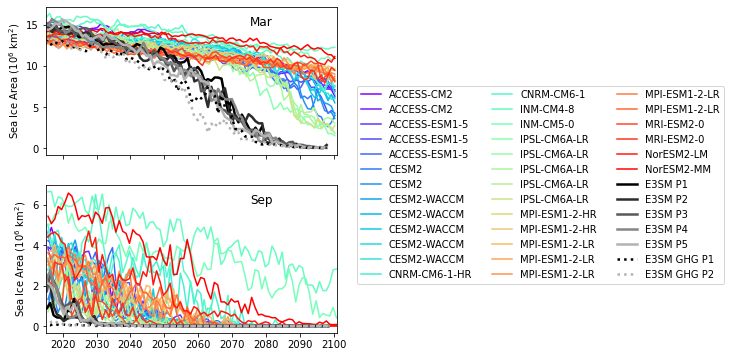

In [8]:
cmap = cm.get_cmap('rainbow')
nsource = len(sources)
ifrac = np.linspace(0,1,nsource)
cmap2 = cm.get_cmap('gray')
# ifrac2 = np.linspace(0,0.7,ne3smcase)
ifrac2 = np.linspace(0,0.7,5)
ifrac3 = np.linspace(0,0.7,ne3smcase-5)

fig, axarr = plt.subplots(2,1, sharex='col' )
fig.set_size_inches(6, 6)
imon_list = [2, 8]
for i,imon in enumerate(imon_list):
    e3sm_label = []
    for k in np.arange(nsource):
        axarr[i].plot(esgf_time[imon::12], esgf_data[k,imon::12], \
                        color=cmap(ifrac[k]), label=sources[k]['model'])
        axarr[i].set_ylabel('Sea Ice Area ($10^6$ km$^2$)')
    axarr[i].text(0.7, 0.85, calendar.month_abbr[imon+1], \
                    transform=axarr[i].transAxes, \
                    fontsize=12, color='k', va='bottom')
    for k in np.arange(ne3smcase):
        if k <= 4:
            label = 'E3SM P{:d}'.format(k+1)
            axarr[i].plot(e3sm_time[imon::12], e3sm_data[k,imon::12], \
                          color=cmap2(ifrac2[k]), linewidth=2.5, label=label)
        else:
            label = 'E3SM GHG P{:d}'.format(k-4)
            axarr[i].plot(e3sm_time[imon::12], e3sm_data[k,imon::12], \
                          color=cmap2(ifrac3[k-5]), linestyle='dotted', \
                          linewidth=2.5, label=label)
        e3sm_label.append(label)

    axarr[i].set_xlim([esgf_time[0], esgf_time[-1]])
axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, 1.), ncol=3)

# save figure
if save_fig:
    plt.subplots_adjust(right=0.8)
    figname = fig_root+'/CMIP6_ScenarioMIP_'+varname+'.png'
    fig.savefig(figname, dpi = 300)

In [9]:
print(e3sm_label)

['E3SM P1', 'E3SM P2', 'E3SM P3', 'E3SM P4', 'E3SM P5', 'E3SM GHG P1', 'E3SM GHG P2']


In [10]:
np.savez('e3sm_'+varname+'.npz', data=e3sm_data, time=e3sm_time, label=e3sm_label)

In [11]:
esgf_label = [s['model']+'_'+s['variantid'] for s in sources]
print(esgf_label)

['ACCESS-CM2_r1i1p1f1', 'ACCESS-CM2_r3i1p1f1', 'ACCESS-ESM1-5_r1i1p1f1', 'ACCESS-ESM1-5_r2i1p1f1', 'ACCESS-ESM1-5_r3i1p1f1', 'CESM2_r1i1p1f1', 'CESM2_r2i1p1f1', 'CESM2-WACCM_r1i1p1f1', 'CESM2-WACCM_r2i1p1f1', 'CESM2-WACCM_r3i1p1f1', 'CESM2-WACCM_r4i1p1f1', 'CESM2-WACCM_r5i1p1f1', 'CNRM-CM6-1-HR_r1i1p1f2', 'CNRM-CM6-1_r1i1p1f2', 'INM-CM4-8_r1i1p1f1', 'INM-CM5-0_r1i1p1f1', 'IPSL-CM6A-LR_r14i1p1f1', 'IPSL-CM6A-LR_r1i1p1f1', 'IPSL-CM6A-LR_r2i1p1f1', 'IPSL-CM6A-LR_r3i1p1f1', 'IPSL-CM6A-LR_r4i1p1f1', 'MPI-ESM1-2-HR_r1i1p1f1', 'MPI-ESM1-2-HR_r2i1p1f1', 'MPI-ESM1-2-LR_r10i1p1f1', 'MPI-ESM1-2-LR_r1i1p1f1', 'MPI-ESM1-2-LR_r2i1p1f1', 'MPI-ESM1-2-LR_r3i1p1f1', 'MPI-ESM1-2-LR_r4i1p1f1', 'MRI-ESM2-0_r1i1p1f1', 'MRI-ESM2-0_r1i2p1f1', 'NorESM2-LM_r1i1p1f1', 'NorESM2-MM_r1i1p1f1']


In [12]:
np.savez('esgf_'+varname+'.npz', data=esgf_data, time=esgf_time, label=esgf_label)